The specific task we are trying to solve is image classification. We will be using a very commong dataset called CIFAR-10 that has 60,000 images (50,000 for training and 10,000 for testing) separated into 10 classes (link for Keras , link for Pytorch). The classes are
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


**In this task, you will:** Use a modern machine learning library (Pytorch/TF/Keras)
-- Writing the chosen library-specific code.

-- Evaluating neural network models.

-- Create three neural network models and train each for the classsification task above, where each of the models described should be a different Python class with the specified name.
> **NetA :** *The first neural network will be the simplest, in that it has no hidden layers.*
- *It should take the image and flatten it to a vector for the input, and then have 10 outputs, one for each class.*
- *There should be no non-linearities for this network and is just a very simple linear classifier.*

> **NetB :** *The second neural network will be slightly more complicated in that it has a hidden layer with 300nodes and adds a non-linearity between the layers. It should use the following operations in this order:*
- *Flatten the image to a vector for the input*
- *Use a fully-connected linear layer with 300 hidden-neurons*
- *Use the ReLU activation function*
- *Use a fully-connected linear layer to the 10 outputs.*
- *Neural Network-Training And Evaluation*
- *[7/30/2021 BasicNeuralNetwork-TrainingAndEvaluation.ipynb - Colaboratory](https://colab.research.google.com/drive/1qD8Z6RXVzch4eTWoru19_AtvtrPsZc4A#scrollTo=JJORzpttqKNl&printMode=true)*

> **NetC :** *This third neural network will be a convolutional neural network. It should use the following
operations in this order:*
- *Use a convolution layer with kernel-width 5 and depth 25*
- *Use the ReLU activation function*
- *Use a max-pool operation with kernel-width 2 and stride 2*
- *Flatten the image to a vector for the next step's input*
- *Use a fully-connected linear layer to the 10 outputs.*

> Deliverables: You need to submit a google collab notebook which
1. *imports all the important modules for the specific machine learning library you choose,*
2. *loads the training and test dataset,*
3. *trains the given network on the training data for 50 epochs, evaluates the train and test accuracy of the network at the end of each epoch and creates a visualization of the training/test accuracy as the training progresses.*
4. *do this for the three neural network models (NetA, NetB, NetC) described above.*

***The last cell should print the training and test accuracy of each of the three models, including a visualization of the accuracy histories for each model during the training. An example of the last cell is given below for reference only, which can be different from your submission as long as the required outputs are printed.***

```
nets = [NetA(), NetB(), NetC(), NetD()]
histories = []
for net in nets:
    net_name = type(net).__name__
    print(f'==== Training {net_name} ====')
    train_history, test_history = train(net, train_loader, test_loader,
                                        num_epochs=NUM_EPOCHS,
                                        learning_rate=LEARNING_RATE,
                                        compute_accs=True)
    histories.append({
        'name': net_name,
        'net': net,
        'train_accs': train_history,
        'test_accs': test_history
    })
plot_history(histories)
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
# show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Training label:
[6]



In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((32, 32, 3), (1,))

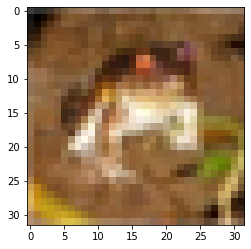

In [5]:
# Plot a single sample
plt.imshow(train_data[0])

In [6]:
# Check out sample label
int(train_labels[0])

6

In [7]:
# Create a small list so we can index onto our training labels so they're human-readable
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

len(class_name)

10

Text(0.5, 1.0, 'ship')

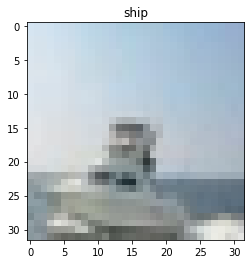

In [8]:
# Plot an example image and it's label
index_choise = 100
plt.imshow(train_data[index_choise])
plt.title(class_name[int(train_labels[index_choise])])

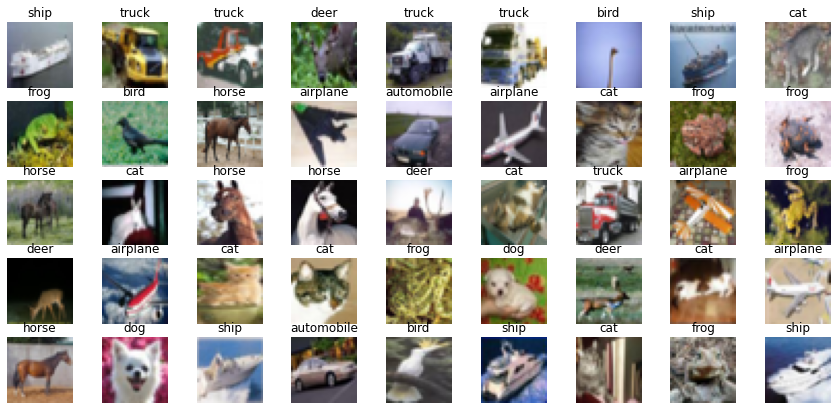

In [9]:
# Plot multiple random images of CIFAR-10 dataset
import random
plt.figure(figsize=(15, 7))
for i in range(45):
    ax = plt.subplot(5, 9, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(class_name[int(train_labels[rand_index])])
    plt.axis(False)

In [10]:
train_data[0].shape

(32, 32, 3)

## NetA : *The first neural network will be the simplest, in that it has no hidden layers.*

- *It should take the image and flatten it to a vector for the input, and then have 10 outputs, one for each class.*
- *There should be no non-linearities for this network and is just a very simple linear classifier.*

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_NetA = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
], name='NetA')

# Compile the model
model_NetA.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

In [12]:
model_NetA.summary()

Model: "NetA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
history_NetA = model_NetA.fit(train_data, train_labels,
                              epochs=10, 
                              validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 101.2935 - accuracy: 0.2355 - val_loss: 69.5460 - val_accuracy: 0.2728
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 87.5215 - accuracy: 0.2618 - val_loss: 78.8041 - val_accuracy: 0.2646
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 82.2894 - accuracy: 0.2690 - val_loss: 91.6235 - val_accuracy: 0.2522
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 85.8007 - accuracy: 0.2679 - val_loss: 88.8954 - val_accuracy: 0.2930
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 85.2387 - accuracy: 0.2730 - val_loss: 106.7981 - val_accuracy: 0.2212
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 85.7368 - accuracy: 0.2738 - val_loss: 78.7714 - val_accuracy: 0.2592
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 83.7422 - accuracy: 0.2791 - val_loss: 64.9681

In [28]:
model_NetA.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 100.8444 - accuracy: 0.2200


[100.84442138671875, 0.2199999988079071]

In [14]:
def plot_loss_curves(history_):
    '''
    Returns separate loss curves for training and validation metrics.
    '''
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']
    
    accuracy = history_.history['accuracy']
    val_accuracy = history_.history['val_accuracy']
    
    epochs = range(len(history_.history['loss'])) # How many epochs did we run for?
    
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training_loss')
    plt.plot(epochs, val_loss, label='Val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

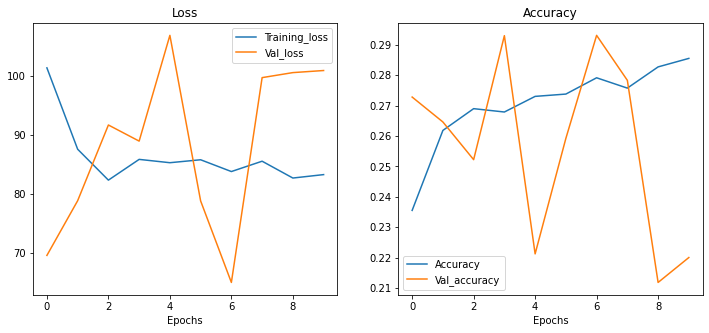

In [15]:
plot_loss_curves(history_NetA)

## **NetB :** *The second neural network will be slightly more complicated in that it has a hidden layer with 300nodes and adds a non-linearity between the layers. It should use the following operations in this order:*
- *Flatten the image to a vector for the input*
- *Use a fully-connected linear layer with 300 hidden-neurons*
- *Use the ReLU activation function*
- *Use a fully-connected linear layer to the 10 outputs.*
- *Neural Network-Training And Evaluation*
- *[7/30/2021 BasicNeuralNetwork-TrainingAndEvaluation.ipynb - Colaboratory](https://colab.research.google.com/drive/1qD8Z6RXVzch4eTWoru19_AtvtrPsZc4A#scrollTo=JJORzpttqKNl&printMode=true)*

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_NetB = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
], name='NetB')

# Compile the model
model_NetB.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

In [17]:
model_NetB.summary()

Model: "NetB"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 75)        300       
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 75)        5700      
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 75)        5700      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 75)        5700      
_________________________________________________________________
flatten_1 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                768010    
Total params: 785,410
Trainable params: 785,410
Non-trainable params: 0
________________________________________________________

In [18]:
# Fit the model
history_NetB = model_NetB.fit(train_data, train_labels,
                              epochs=10, 
                              validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 3.1302 - accuracy: 0.3798 - val_loss: 1.7255 - val_accuracy: 0.3910
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6990 - accuracy: 0.4098 - val_loss: 1.7790 - val_accuracy: 0.3637
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6277 - accuracy: 0.4327 - val_loss: 1.5979 - val_accuracy: 0.4446
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5446 - accuracy: 0.4629 - val_loss: 1.6242 - val_accuracy: 0.4312
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4870 - accuracy: 0.4807 - val_loss: 1.5978 - val_accuracy: 0.4548
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4350 - accuracy: 0.5044 - val_loss: 1.6580 - val_accuracy: 0.4497
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3642 - accuracy: 0.5263 - val_loss: 1.7162 - val_ac

In [29]:
model_NetB.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 1.9843 - accuracy: 0.4369


[1.9843285083770752, 0.43689998984336853]

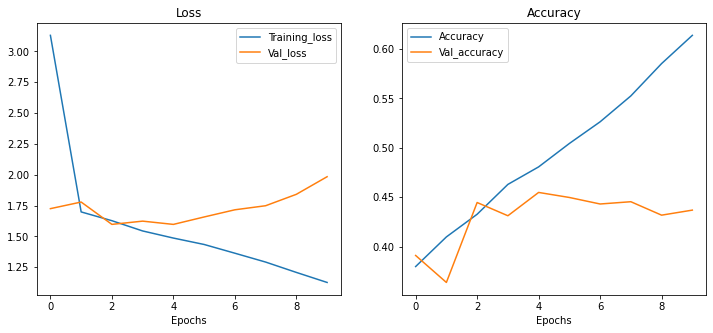

In [19]:
plot_loss_curves(history_NetB)

## **NetC :** *This third neural network will be a convolutional neural network. It should use the following*
*operations in this order:*
- *Use a convolution layer with kernel-width 5 and depth 25*
- *Use the ReLU activation function*
- *Use a max-pool operation with kernel-width 2 and stride 2*
- *Flatten the image to a vector for the next step's input*
- *Use a fully-connected linear layer to the 10 outputs.*

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_NetC = tf.keras.Sequential([
    tf.keras.layers.Conv2D(25, 5, activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(25, 5, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(25, 5, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10)
], name='NetC')

# Compile the model
model_NetC.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

In [25]:
model_NetC.summary()

Model: "NetC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 25)        15650     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 25)          15650     
_________________________________________________________________
flatten_3 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                650    

In [26]:
# Fit the model
history_NetC = model_NetC.fit(train_data, train_labels,
                              epochs=10, 
                              validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9848 - accuracy: 0.2783 - val_loss: 1.7557 - val_accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5793 - accuracy: 0.4170 - val_loss: 1.5513 - val_accuracy: 0.4321
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4638 - accuracy: 0.4692 - val_loss: 1.4111 - val_accuracy: 0.4942
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3873 - accuracy: 0.5017 - val_loss: 1.3806 - val_accuracy: 0.5089
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3262 - accuracy: 0.5271 - val_loss: 1.3240 - val_accuracy: 0.5388
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2791 - accuracy: 0.5457 - val_loss: 1.3654 - val_accuracy: 0.5214
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2194 - accuracy: 0.5715 - val_loss: 1.2847 - val_accuracy:

In [30]:
model_NetC.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2101 - accuracy: 0.5825


[1.2101032733917236, 0.5824999809265137]

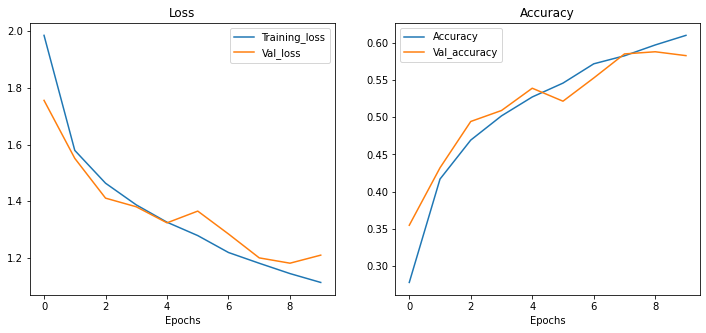

In [27]:
plot_loss_curves(history_NetC)